### FORMA 1 - GRADIENT DESCENT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import time
import os
from PIL import Image
import pandas as pd


In [2]:
# Inicialización variables X e y

X = np.arange(10)
y = np.array([ 8,5,4,2,6,7,6,8,9,10])

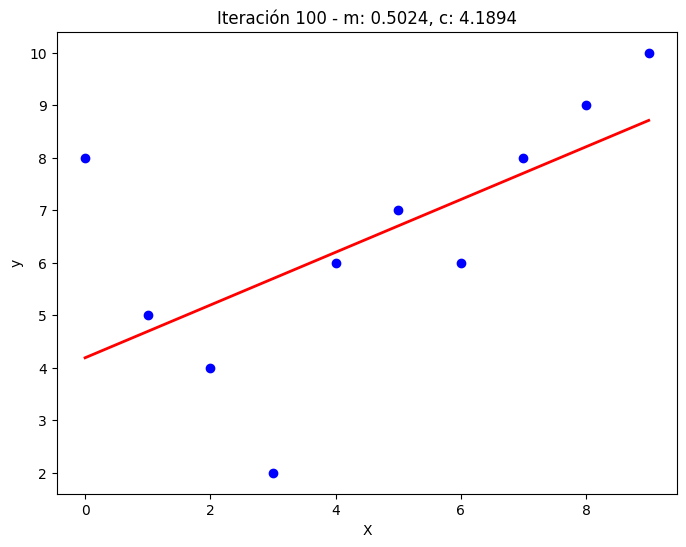


Descenso de gradiente finalizado.
Final m: 0.502416149627028
Final c: 4.189410130195606


In [3]:
# 1. Inicializa los parametros m y c a cero o con valores aleatorios.
m = 0
c = 4.1 # Modifcando c llegamos al punto óptimo con menos iteraciones

# 2. Elegimos un numero de iteraciones y un learning_rate 

learning_rate = 0.001

# Obtener el número de muestras (n) para las derivadas
n = len(X)

# # Carpeta para guardar imágenes
folder = "imagenes"
os.makedirs(folder, exist_ok=True)

# 4. Calculamos la derivada del error respecto de m y c:for i in range(num_iteraciones):

for i in range(100):
    y_pred = m * X + c

    dm = (2/n) * np.sum((y - y_pred) * (-X)) 
    dc = (2/n) * np.sum((y - y_pred) * (-1)) 

    m = m - dm * learning_rate
    c = c - dc * learning_rate

    # Visualizar en pantalla en cada iteración
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Datos Originales')
    plt.plot(X, m * X + c, color='red', linewidth=2, label='Línea de Regresión') 
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f"Iteración {i+1} - m: {m:.4f}, c: {c:.4f}") 
    clear_output(wait=True) 
    plt.show()               
    time.sleep(0.01)         
    plt.close()             

    # Guardar imagen solo cada 5 iteraciones y la primera iteración
    if i == 0 or (i + 1) % 5 == 0:
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Datos Originales')
        plt.plot(X, m * X + c, color='red', linewidth=2, label='Línea de Regresión') 
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f"Iteración {i+1} - m: {m:.4f}, c: {c:.4f}")
        plt.savefig(f"{folder}/plot_{i+1}.png")
        plt.close()        

print("\nDescenso de gradiente finalizado.")
print(f"Final m: {m}")
print(f"Final c: {c}")



In [4]:
images = []
iters_to_load= [1] + list(range(5, 101, 5))
durations = []

for iter_num in iters_to_load:
    filename = os.path.join(folder, f"plot_{iter_num}.png")
    if os.path.exists(filename):
        frame = Image.open(filename)
        images.append(frame)
        if iter_num <= 100:
            durations.append(200)  
        else:
            durations.append(200)  

if images:
    images[0].save("gradiente_descenso.gif",
                   save_all=True,
                   append_images=images[1:],
                   duration=durations,
                   loop=0)
else:
    print("No hay imágenes para crear el GIF")


### FORMA 2 - ECUACION NORMAL


In [5]:
X = X.reshape(-1, 1)
# Añadir columna de unos
X_1 = np.c_[np.ones((10, 1)), X]

best_W = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)
best_W[0] # intercepto
best_W[1] # coeficiente
y_pred = best_W[0] + best_W[1] * X 
print(best_W[0],best_W[1])

4.345454545454546 0.4787878787878789


### FORMA 3 - SKLEARN

In [6]:
X = X.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X, y)

m_sklearn = lr.coef_
c_sklearn = lr.intercept_

print(m_sklearn,c_sklearn)


[0.47878788] 4.345454545454546


In [7]:
# Tabla comparativa
tabla = pd.DataFrame({
    "Método": ["Descenso de Gradiente", "Ecuación Normal", "Sklearn"],
    "m": [m, best_W[1], m_sklearn],
    "c": [c, best_W[0], c_sklearn]
})

tabla

,Método,m,c
0,Descenso de Gradiente,0.502416,4.189410
1,Ecuación Normal,0.478788,4.345455
2,Sklearn,[0.4787878787878788],4.345455
